**CMSC178DA**
# ACTIVITY 4: Applying Multiple Linear Regression Analysis to Multivariate Data <br>

## Submitted by:

Peladas, Daenielle Rai A. <br>
Section B - TF 10:30 AM - 12:00 AM

---

## The Case 

Let us reuse the performance data on remote procedure call (RPC) mechanism for two (2)
mainframe operating systems (OS) - UNIX and ARGUS – in Activity 3. The performance metric
was total elapsed time (in milliseconds), which was measured for various data sizes (see Table 1).
**Fit a multiple linear regression model that combine the sample measurements on total elapsed
time in processing with various data sizes for the two OSes.**

---

## Import Dataset

### Import Library

In [294]:
import pandas as pd
import numpy as np

### Read CSV

In [297]:
path = r"C:\Users\daeni\Desktop\LOVE\Academics\CMSC178DA/Activity/Multiple Linear Regression/os_concat_rpc.csv"
df = pd.read_csv(path)

In [299]:
df.drop("Unnamed: 0", axis=1).head()

,Data Bytes,Time,OS
0,64,26.4,Unix
1,64,26.4,Unix
2,64,26.4,Unix
3,64,26.2,Unix
4,234,33.8,Unix


#### One Hot Encoding the OS

In [304]:
df['OS'] = df['OS'].map({'Argus': 0, 'Unix': 1})

In [306]:
df.drop("Unnamed: 0", axis=1)

,Data Bytes,Time,OS
0,64,26.4,1
1,64,26.4,1
2,64,26.4,1
3,64,26.2,1
4,234,33.8,1
5,590,41.6,1
6,846,50.0,1
7,1060,48.4,1
8,1082,49.0,1
9,1088,42.0,1


## Model Development

### Import libraries

In [230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

### Visualization

Text(0.5, 1.0, 'Data bytes size as a potential predictor of time')

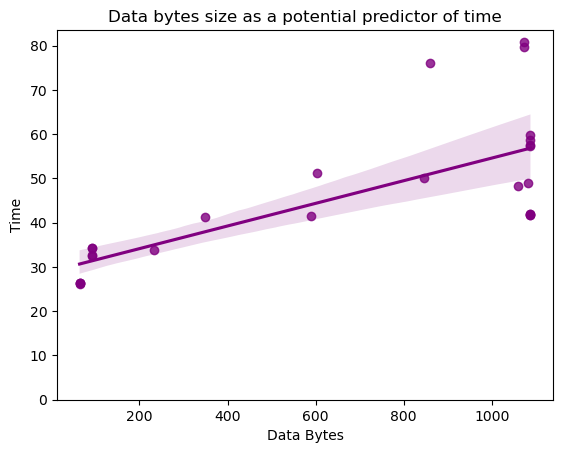

In [308]:
sns.regplot(x="Data Bytes", y="Time", data=df, color='purple')
plt.ylim(0,)
plt.savefig("regplot")
plt.title("Data bytes size as a potential predictor of time")

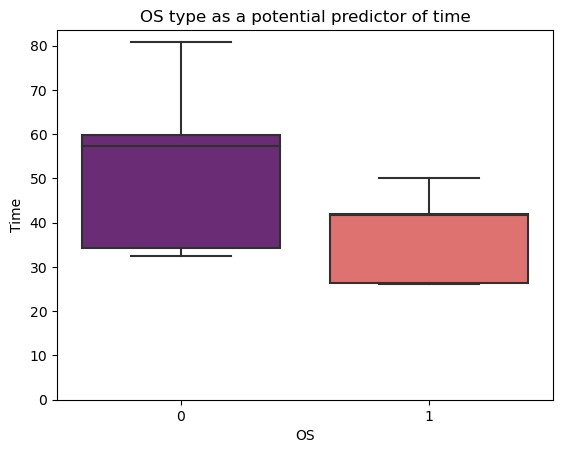

In [310]:
sns.boxplot(x="OS", y="Time", data=df, palette='magma')
plt.ylim(0,)
plt.title("OS type as a potential predictor of time")
plt.savefig("boxplot.png")

### Model Building

In [238]:
lm = LinearRegression()
lm

LinearRegression()

In [240]:
# Predictor and target values
features = df[["Data Bytes", "OS"]]
target = df["Time"]

In [242]:
# Fit the linear model with the given features
lm.fit(features, target)

LinearRegression()

In [244]:
b0 = lm.intercept_

In [246]:
b1, b2 = lm.coef_

In [248]:
print(f"Values\nb0: {b0}\nb1: {b1}\nb2: {b2}")

Values
b0: 36.739006054661886
b1: 0.025206557752234512
b2: -14.926638075724542


#### Structure of Final Linear Function:

$$
y = b_0 + b_1x_1 + b_2x_2
$$

where: <br> 
$y$ = elapsed time <br>
$b_0$ = slope intercept <br>
$b_1$ = coefficient for data bytes <br>
$b_2$ = OS type <br>

In [290]:
argus_y = 36.739006054661886 + (1 * 0.025206557752234512) + (0*-14.926638075724542)
unix_y = 36.739006054661886 + (1 * 0.025206557752234512) + (1*-14.926638075724542)

print(f"Argus Per Byte Processing Cost: {argus_y}\nUnix Per Byte Processing Cost: {unix_y}")

Argus Per Byte Processing Cost: 36.76421261241412
Unix Per Byte Processing Cost: 21.83757453668958


## Model Evaluation with Visualization

### Import libraries

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [257]:
# make prediction first 
y_hat = lm.predict(features)

C:\Users\daeni\AppData\Local\Temp\ipykernel_9948\2326901344.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Time'], hist=False, color="#692c75", label="Actual Value")
C:\Users\daeni\AppData\Local\Temp\ipykernel_9948\2326901344.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



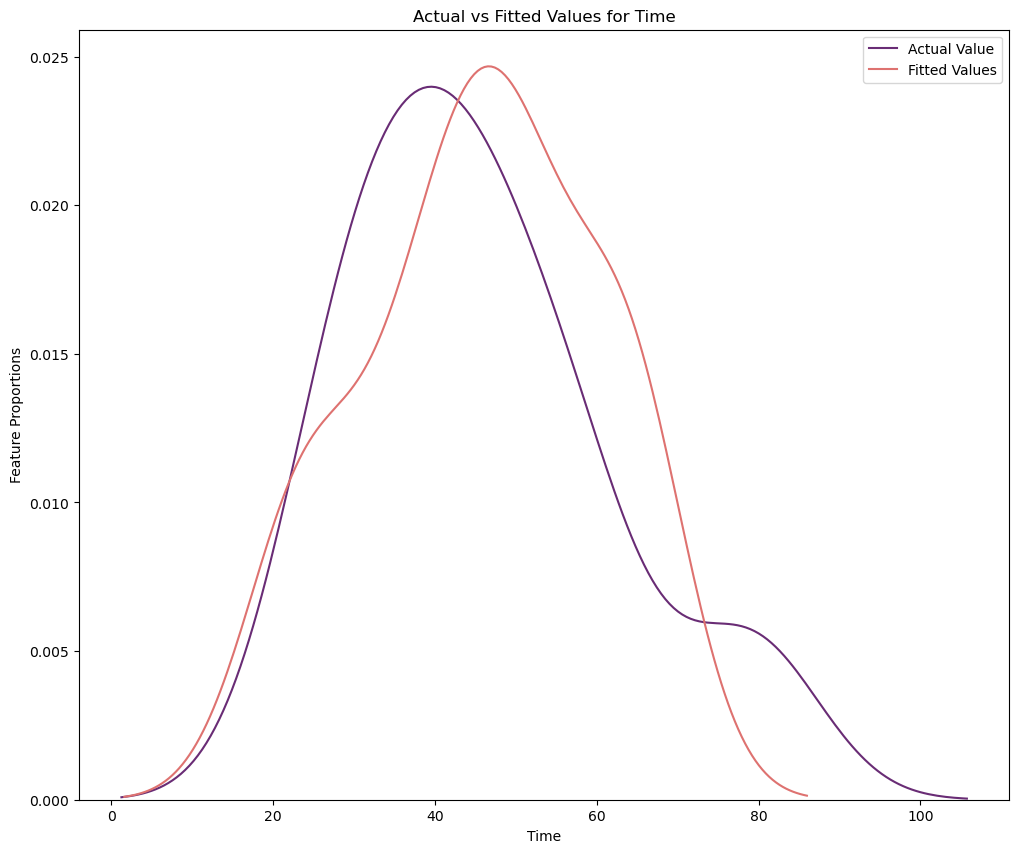

In [313]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(df['Time'], hist=False, color="#692c75", label="Actual Value")
sns.distplot(y_hat, hist=False, color="#de7270", label="Fitted Values" , ax=ax1)

ax1.legend()

plt.title('Actual vs Fitted Values for Time')
plt.xlabel('Time')
plt.ylabel('Feature Proportions')

plt.savefig("actual_vs_fitted_values_for_time.png")

plt.show()
plt.close()

## In-Sample Evaluation

In [262]:
df.corr()

,Unnamed: 0,Data Bytes,Time,OS
Unnamed: 0,1.000000e+00,0.928008,0.573303,-3.651933e-17
Data Bytes,9.280082e-01,1.000000,0.732802,-2.231989e-02
Time,5.733034e-01,0.732802,1.000000,-4.933593e-01
OS,-3.651933e-17,-0.022320,-0.493359,1.000000e+00


### Calculating the R-Squared

In [265]:
lm.score(features, target)

0.764643674084501

$R^2 = 0.7646436740845011$ 

In [268]:
# Adjusted R-squared
1 - (1-lm.score(features, target))*(len(target)-1)/(len(target)-features.shape[1]-1)

0.744177906613588

### Calculating the Mean-Squared Error

In [271]:
y_hat = lm.predict(features)

In [273]:
mse = mean_squared_error(df['Time'], y_hat)
mse

57.55914693177915

$MSE: 57.55914693177913$

In [315]:
import statsmodels.api as sm

In [278]:
# adds the intercept since it is not built in the sm library
X = sm.add_constant(features)
model = sm.OLS(target, X).fit()

# Get summary of the model results
summary = model.summary()

# Print the p-values for the coefficients (look for 'P>|t|' column)
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     37.36
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.95e-08
Time:                        22:04:46   Log-Likelihood:                -89.579
No. Observations:                  26   AIC:                             185.2
Df Residuals:                      23   BIC:                             188.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.7390      3.251     11.302      0.0